<a href="https://colab.research.google.com/github/wusinyee/MW-Portfolio/blob/main/EDA_Chun_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on Telecom Customer Churn Dataset**

### 1. Import necessary libraries and load the data

In [8]:
!pip install plotly ipywidgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import widgets, interactive
from IPython.display import display, HTML

# Load the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 2. Initial data inspection

In [9]:
# Display basic information about the dataset
print(df.info())

# Display the data description
print(df.describe())

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 3. Data cleaning and processing

In [10]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values again
print(df.isnull().sum())

# Handle missing values (here we'll drop them, but you might want to impute)
df = df.dropna()

# Convert 'SeniorCitizen' to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<ipython-input-10-abe2cd36af41>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})


In [24]:
# Define the list of categorical columns
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService'] # Removed the empty string ''

# Encode categorical columns with LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

## 4. Univariate Analysis

###    4.1. Categorical Variables



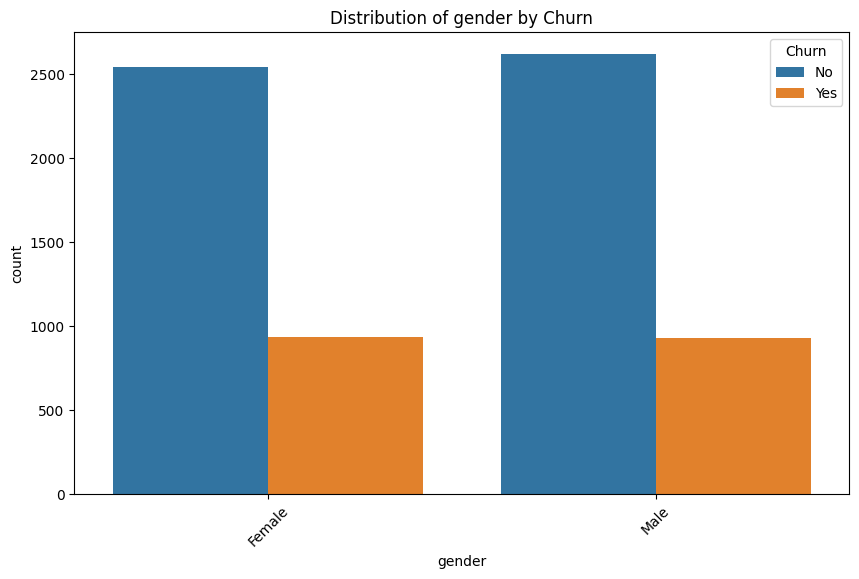

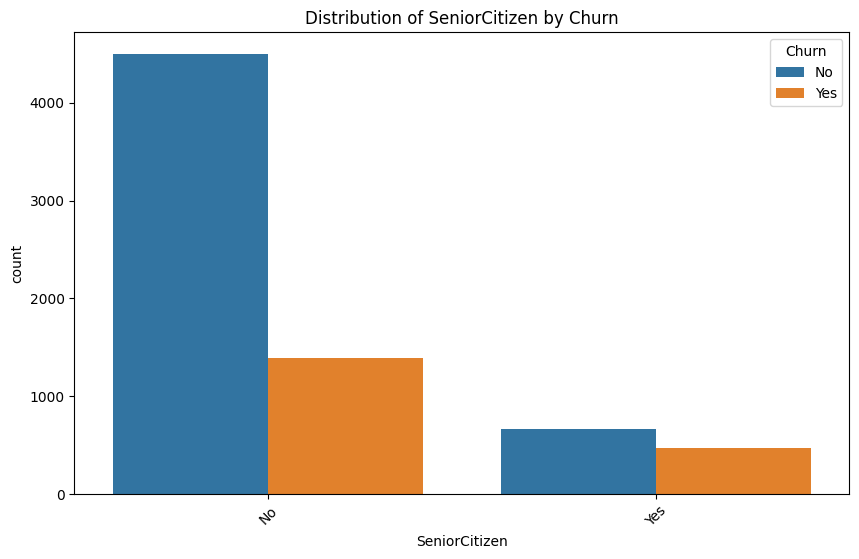

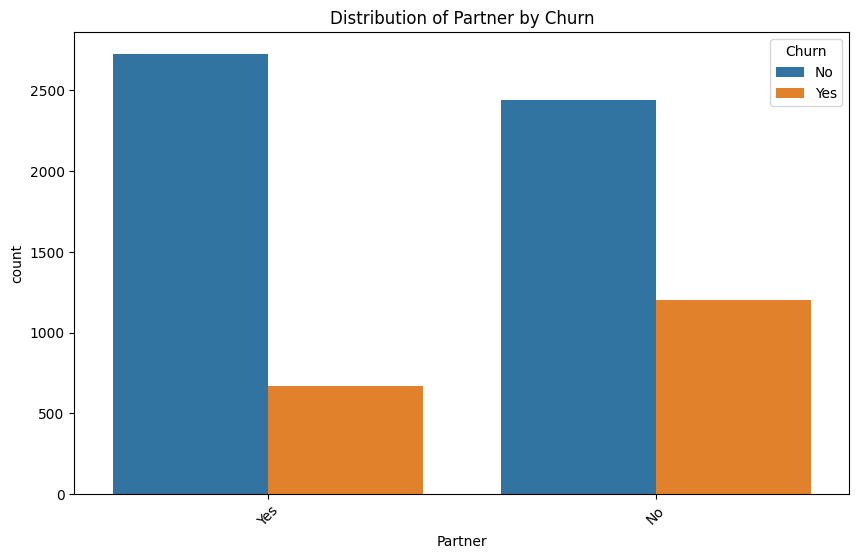

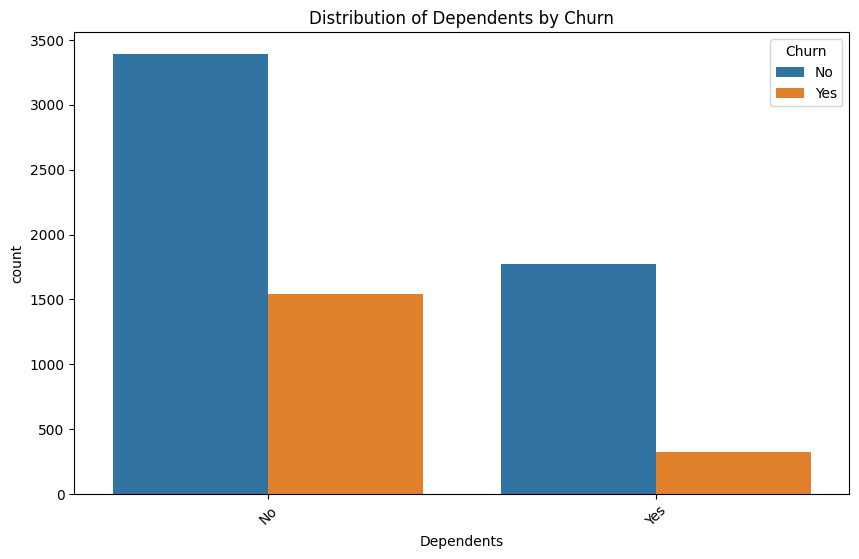

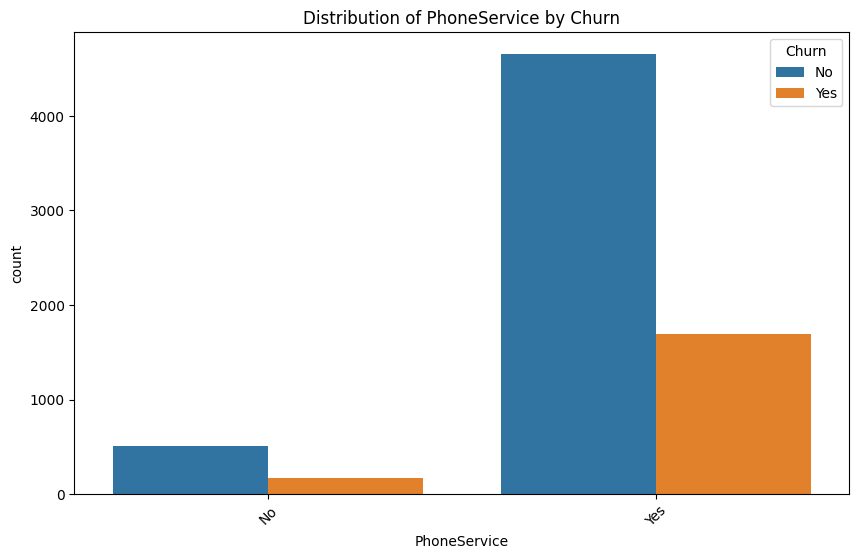

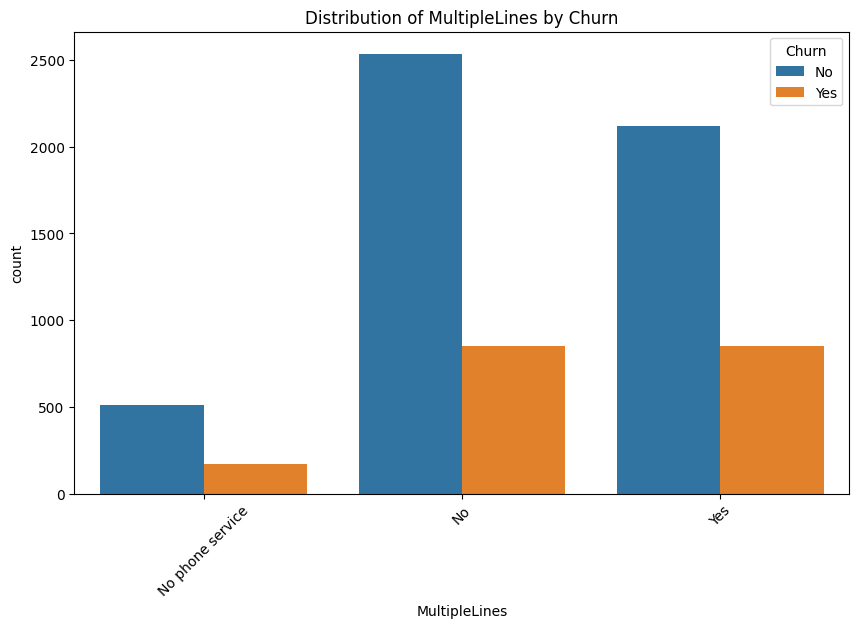

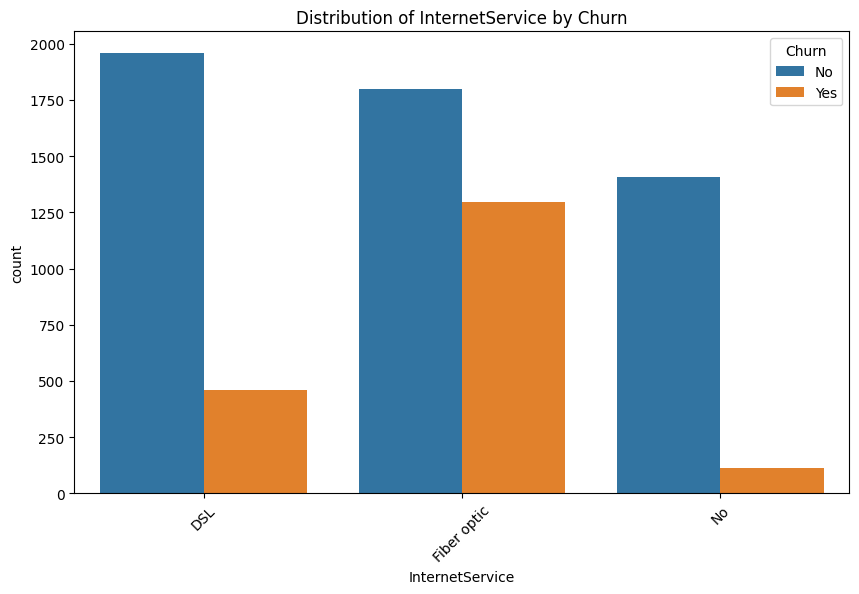

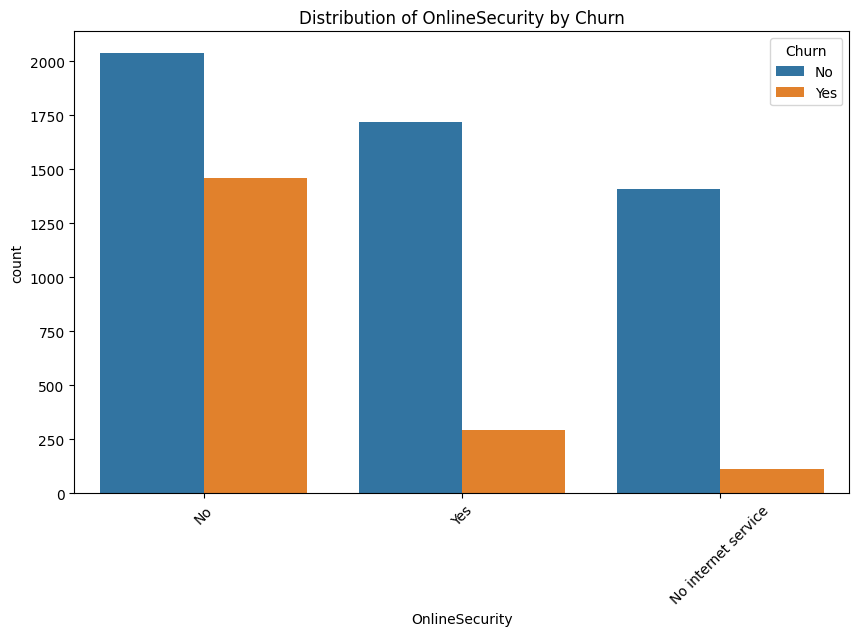

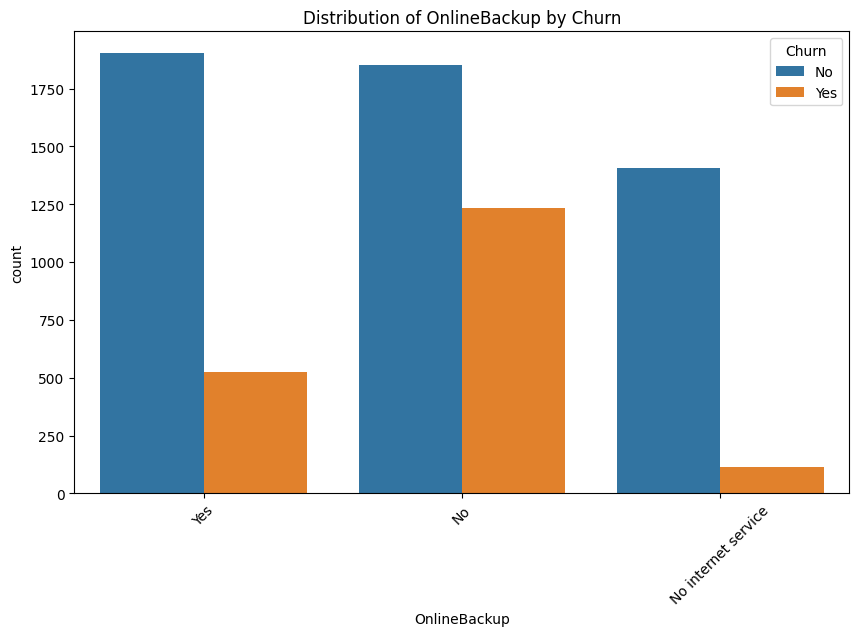

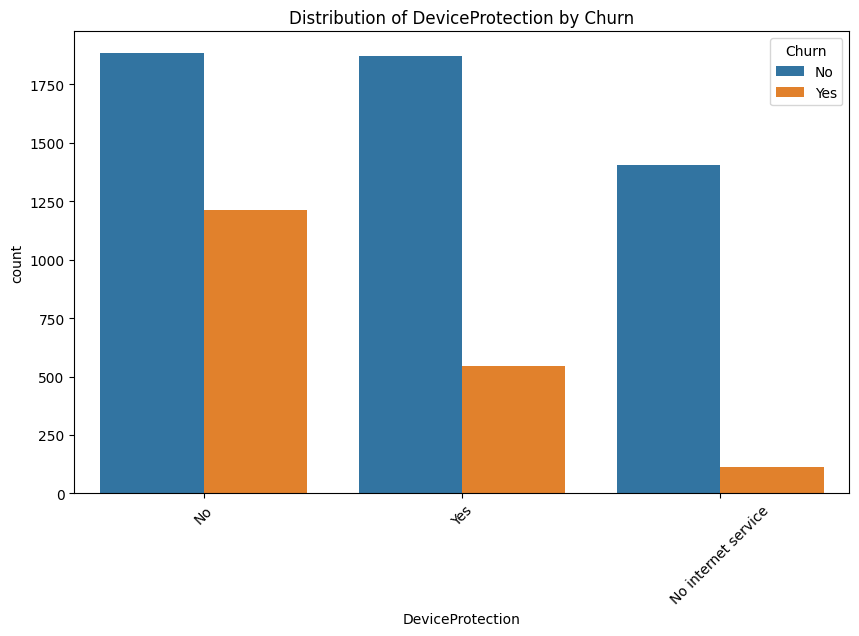

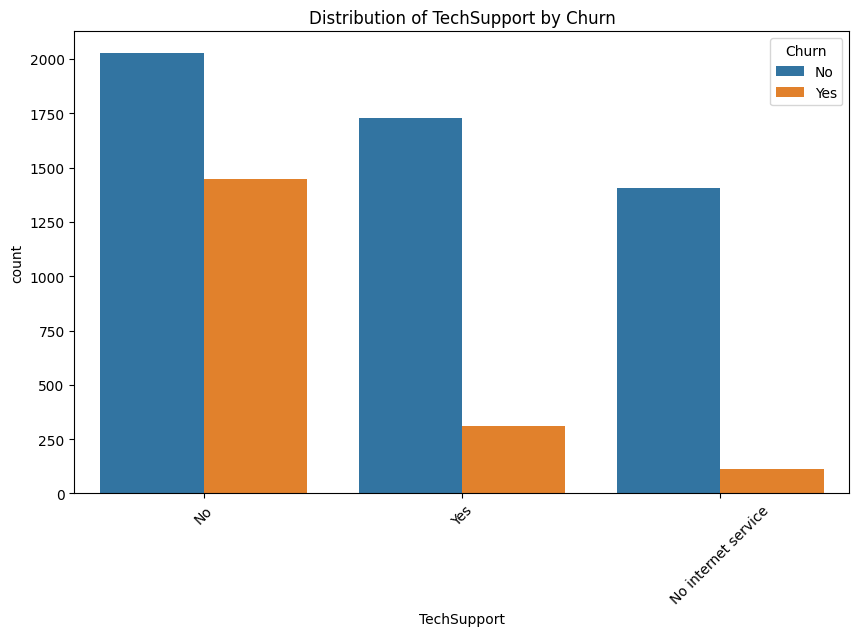

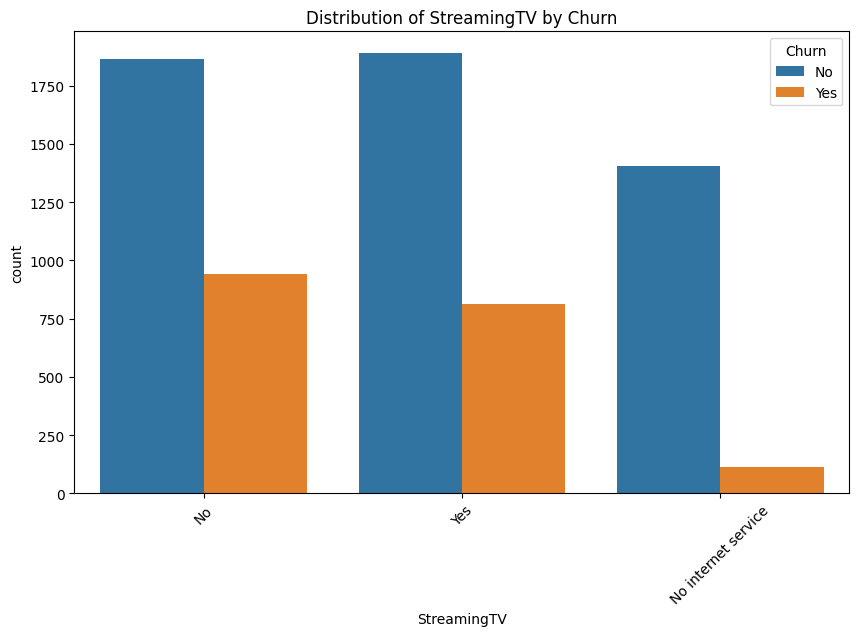

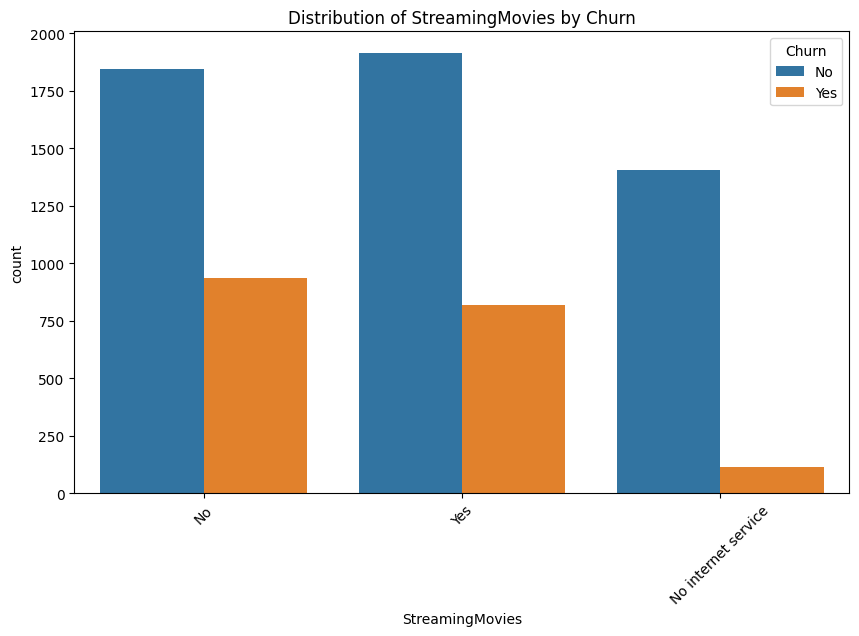

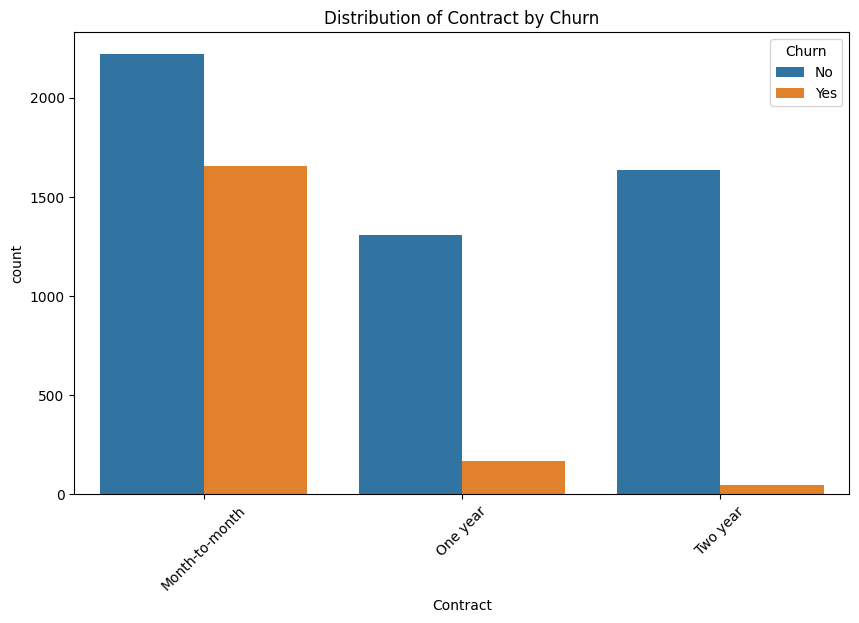

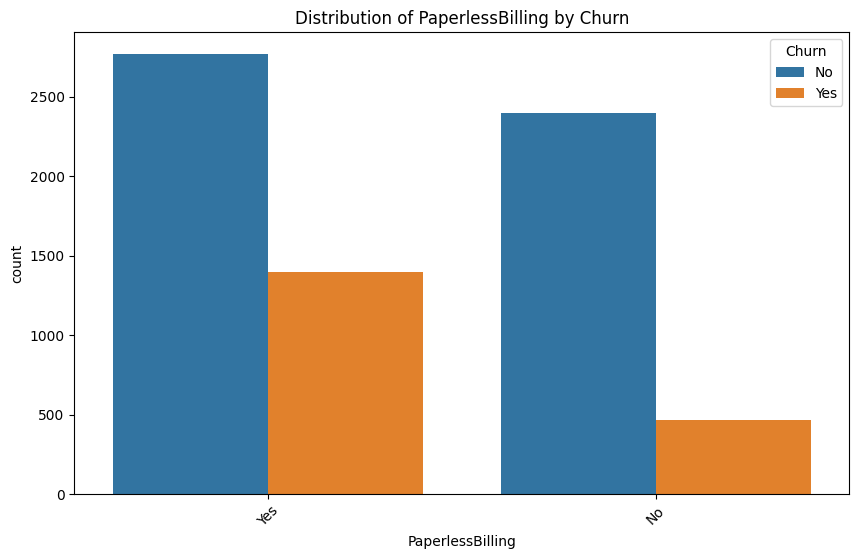

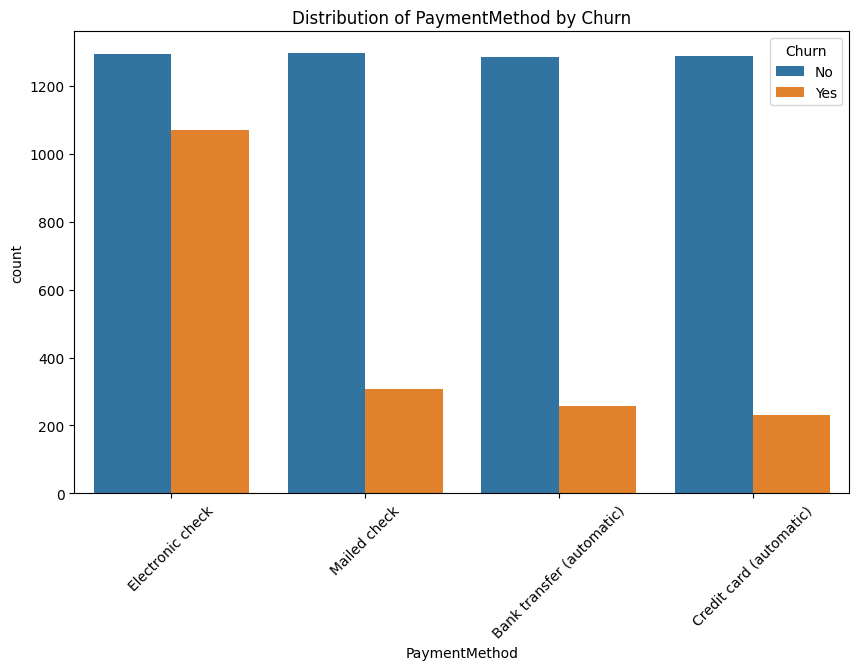

In [12]:
def plot_categorical(dataframe, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataframe, x=column, hue='Churn')
    plt.title(f'Distribution of {column} by Churn')
    plt.xticks(rotation=45)
    plt.show()

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    plot_categorical(df, col)

This will create bar plots for each categorical variable, showing the distribution and its relationship with churn.


###         4.2. Numerical Variables

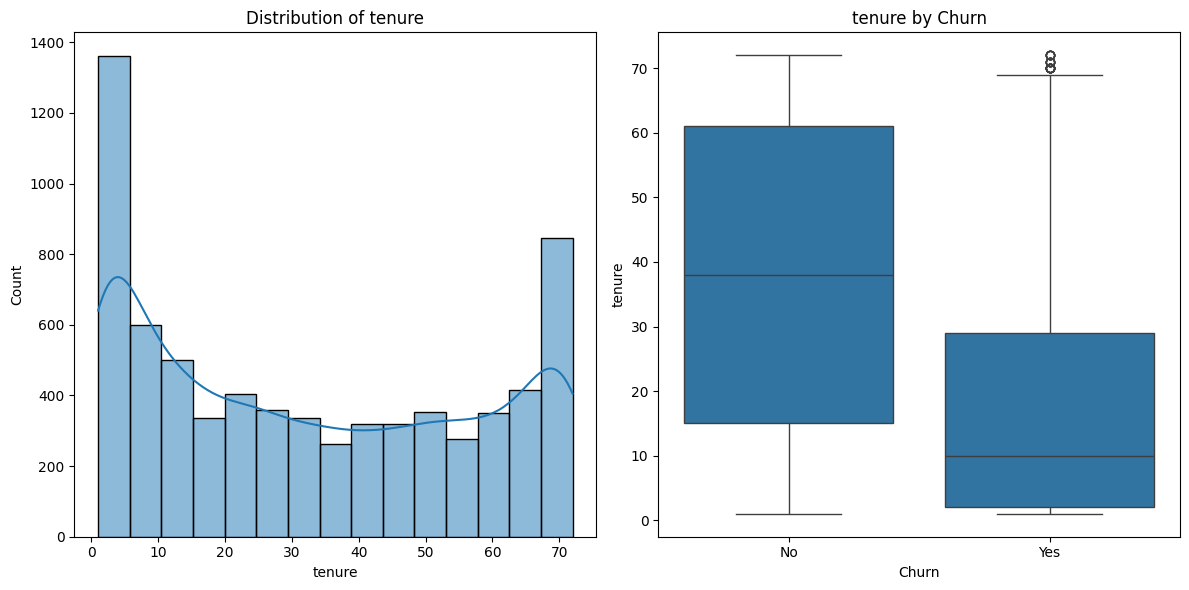

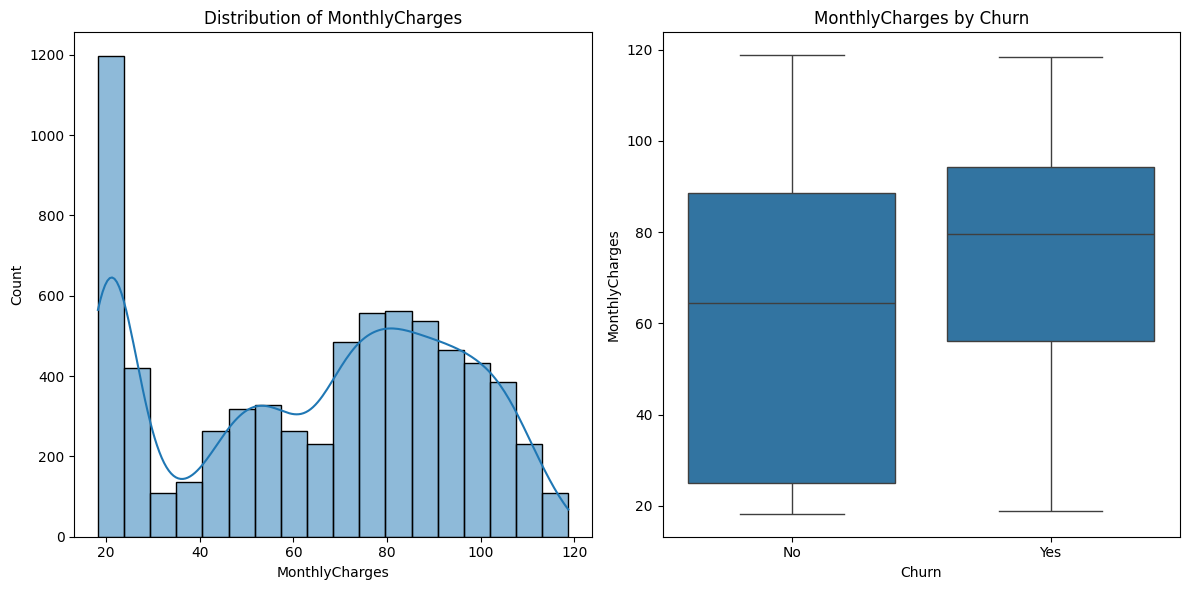

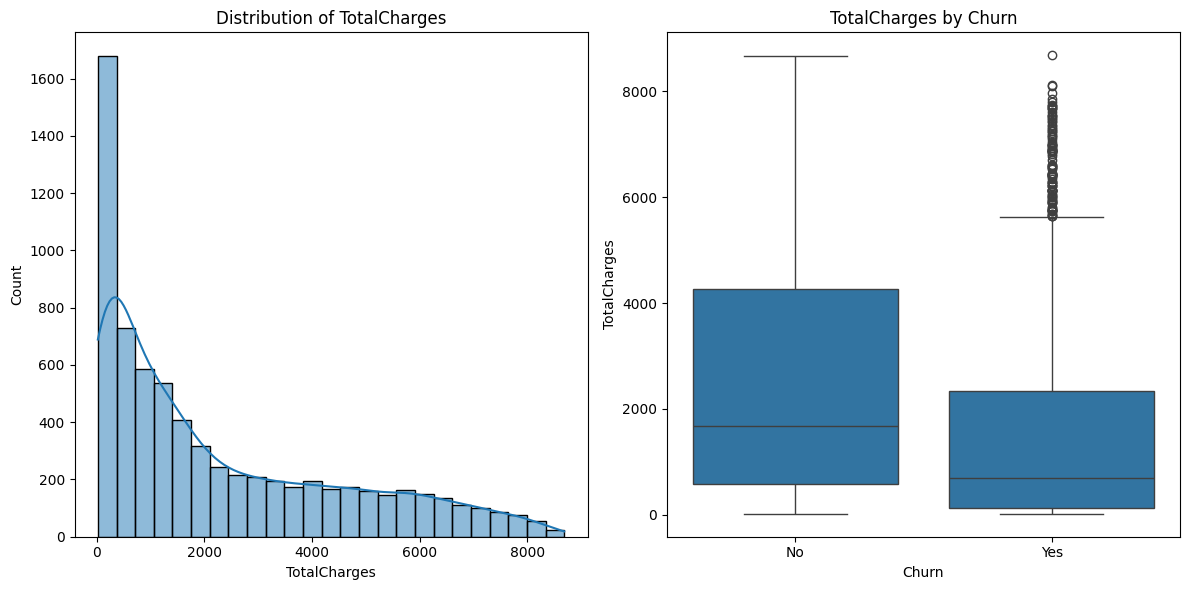

In [13]:
def plot_numerical(dataframe, column):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data=dataframe, x=column, kde=True)
    plt.title(f'Distribution of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=dataframe, y=column, x='Churn')
    plt.title(f'{column} by Churn')

    plt.tight_layout()
    plt.show()

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    plot_numerical(df, col)

This will create histograms and box plots for each numerical variable, showing their distribution and relationship with churn.

## 5. Bivariate Analysis

###    5.1. Correlation Matrix

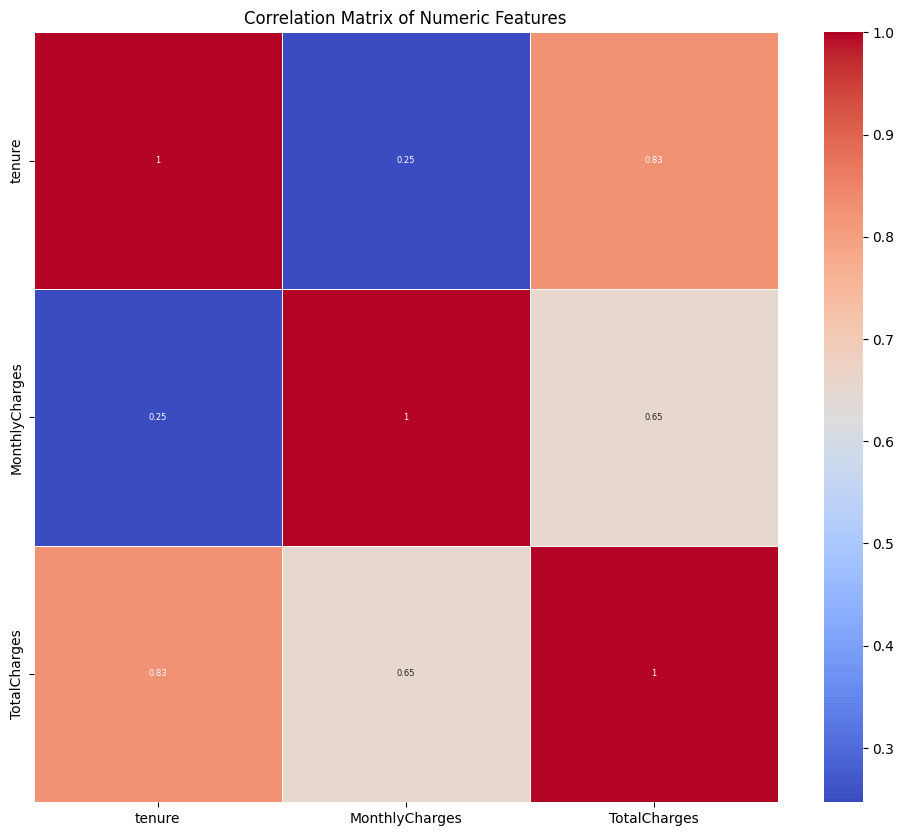

In [15]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap with adjusted font size
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"fontsize":6})
plt.title('Correlation Matrix of Numeric Features')
plt.show()

This will show the correlations between numerical variables.


###    5.2. Churn Rate by Categorical Variables

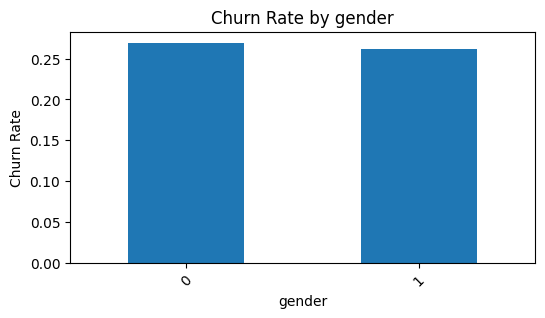

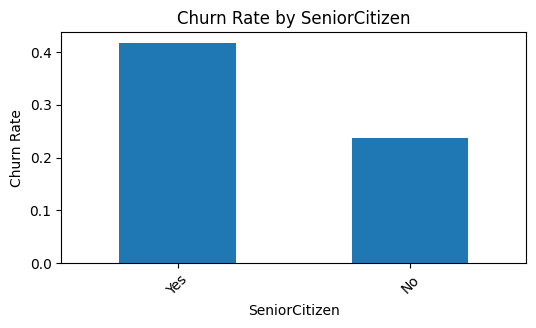

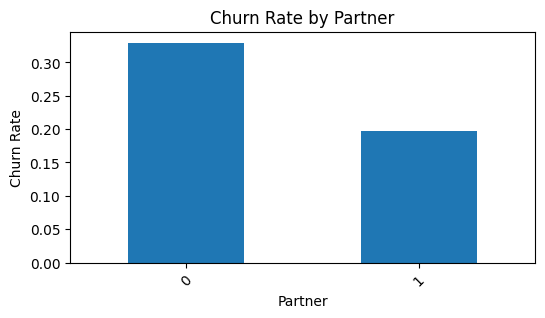

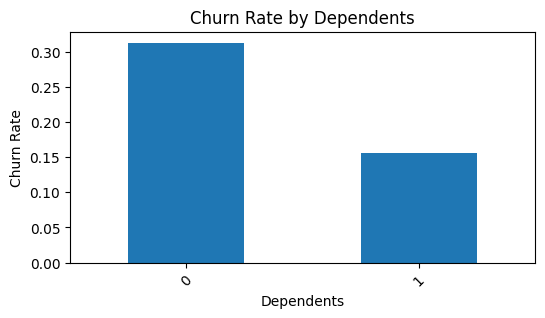

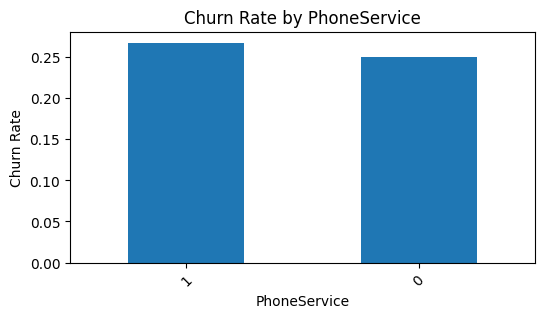

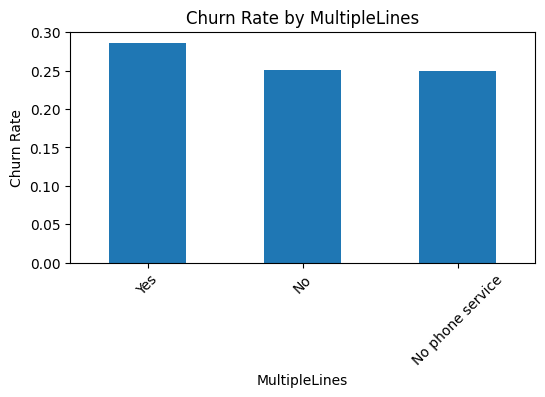

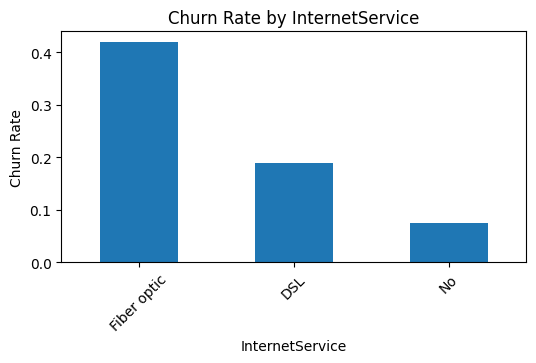

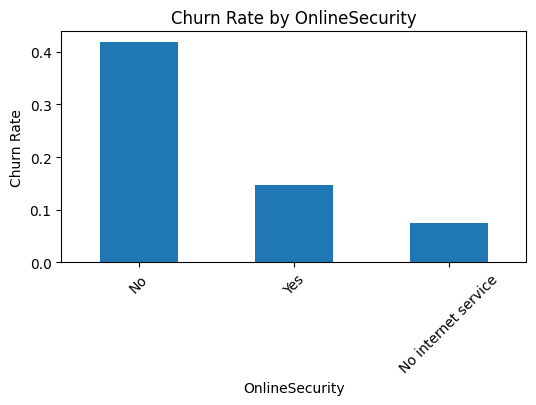

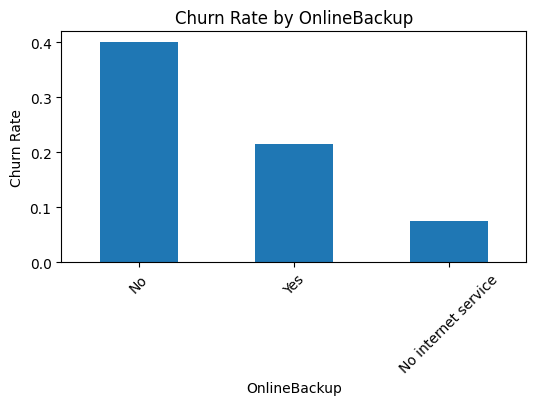

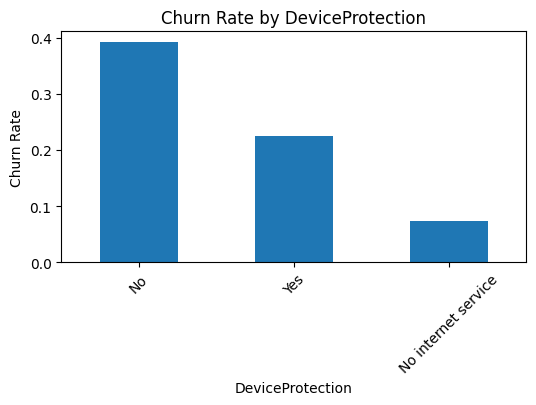

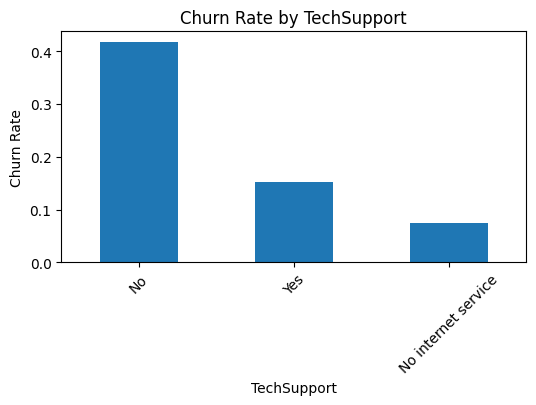

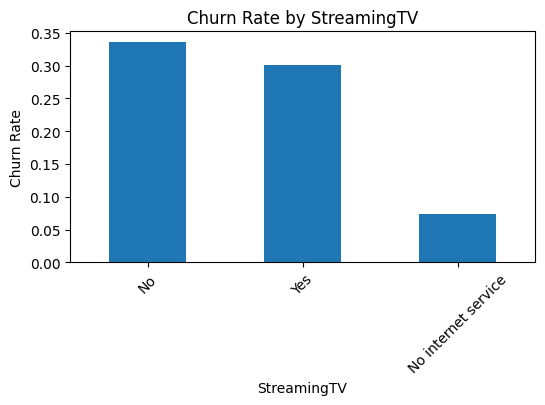

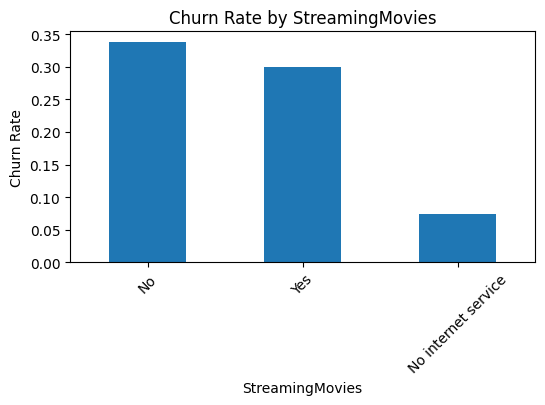

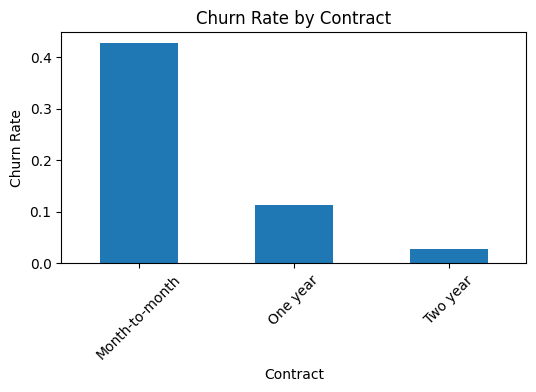

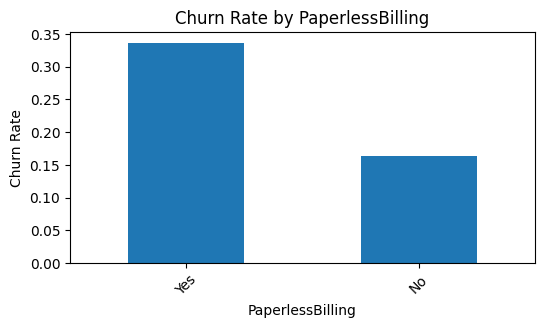

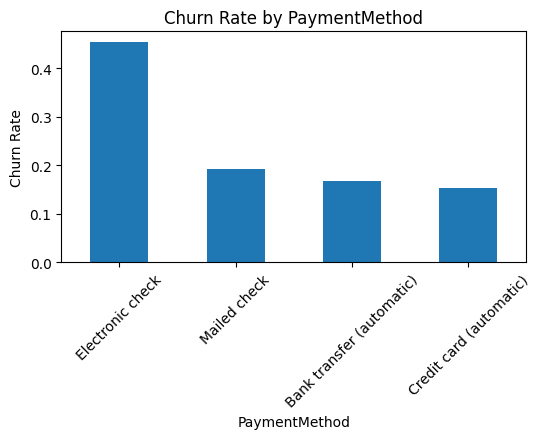

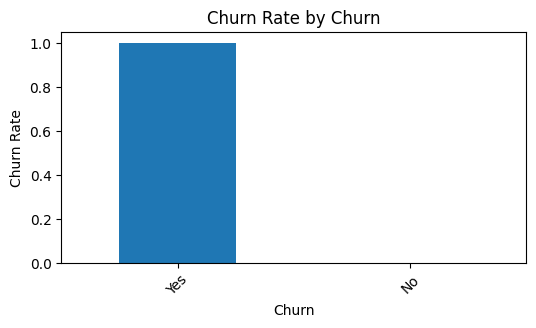

In [26]:
def churn_rate_by_category(dataframe, column):
    # Convert 'Churn' column to numeric (assuming 'Yes' is 1 and 'No' is 0)
    dataframe['Churn_numeric'] = dataframe['Churn'].map({'Yes': 1, 'No': 0})

    churn_rate = dataframe.groupby(column)['Churn_numeric'].mean().sort_values(ascending=False)

    plt.figure(figsize=(6, 3))
    churn_rate.plot(kind='bar')
    plt.title(f'Churn Rate by {column}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()

# Exclude 'customerID' as it is not a meaningful categorical variable for churn analysis
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_cols:
    churn_rate_by_category(df.copy(), col) # Use a copy of the DataFrame to avoid modifying the original

### The definitions for the encoded values in the categorical columns:

* gender: {0: 'Female', 1: 'Male'}
* SeniorCitizen: {0: 'Not a Senior Citizen', 1: 'Senior Citizen'}
* Partner: {0: 'No Partner', 1: 'Has a Partner'}
* Dependents: {0: 'No Dependents', 1: 'Has Dependents'}
* PhoneService: {0: 'No Phone Service', 1: 'Has Phone Service'}
* MultipleLines: {0: 'No Phone Service', 1: 'No Multiple Lines', 2: 'Has Multiple Lines'}
* InternetService: {0: 'No Internet Service', 1: 'DSL', 2: 'Fiber Optic'}
* OnlineSecurity: {0: 'No Internet Service', 1: 'No Online Security', 2: 'Has Online Security'}
* OnlineBackup: {0: 'No Internet Service', 1: 'No Online Backup', 2: 'Has Online Backup'}
* DeviceProtection: {0: 'No Internet Service', 1: 'No Device Protection', 2: 'Has Device Protection'}
* TechSupport: {0: 'No Internet Service', 1: 'No Tech Support', 2: 'Has Tech Support'}
* StreamingTV: {0: 'No Internet Service', 1: 'No Streaming TV', 2: 'Has Streaming TV'}
* StreamingMovies: {0: 'No Internet Service', 1: 'No Streaming Movies', 2: 'Has Streaming Movies'}
* Contract: {0: 'Month-to-Month', 1: 'One Year', 2: 'Two Year'}
* PaperlessBilling: {0: 'No Paperless Billing', 1: 'Uses Paperless Billing'}
* PaymentMethod: {0: 'Electronic Check', 1: 'Mailed Check', 2: 'Bank Transfer (Automatic)', 3: 'Credit Card (Automatic)'}

## 6. Multivariate Analysis

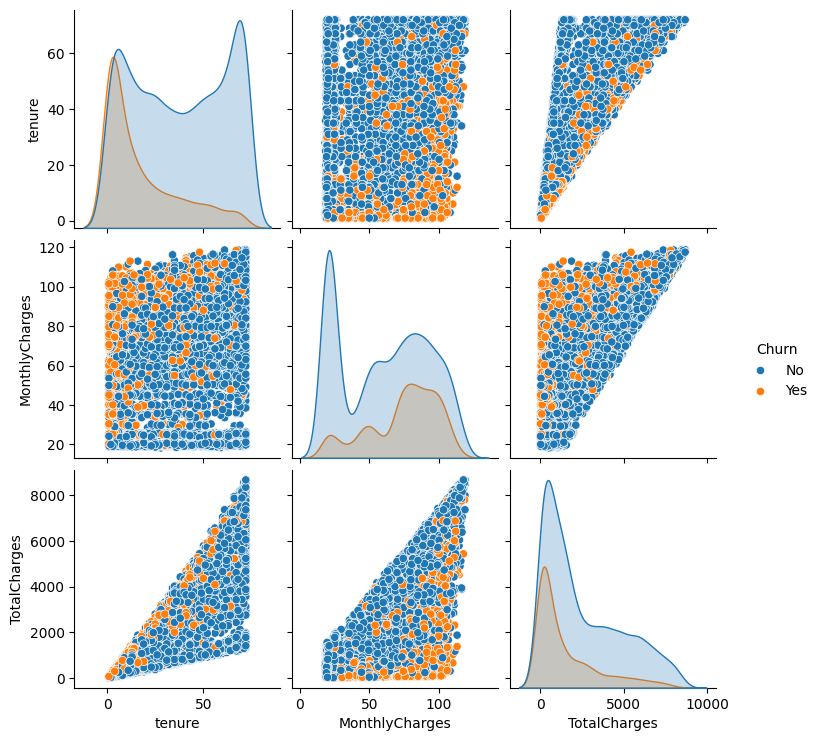

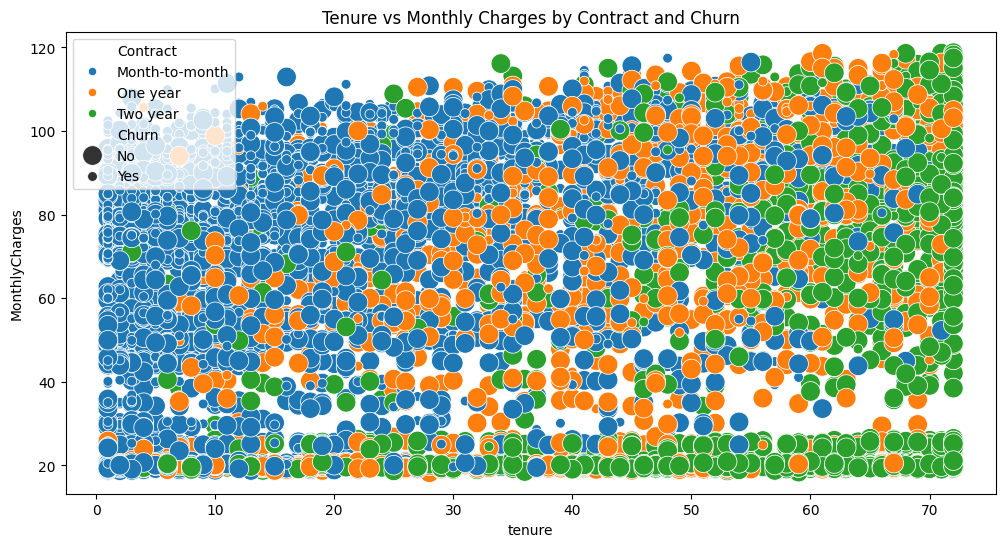

In [27]:
# Pairplot for numerical variables
sns.pairplot(df[numerical_cols + ['Churn']], hue='Churn')
plt.show()

# Analyze tenure, MonthlyCharges, and Contract
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Contract', size='Churn', sizes=(50, 200))
plt.title('Tenure vs Monthly Charges by Contract and Churn')
plt.show()

This will create a pairplot for numerical variables and a scatter plot showing the relationship between tenure, monthly charges, contract type, and churn.

## 7. Statistical Tests

In [35]:
def chi_square_test(dataframe, column):
    contingency_table = pd.crosstab(dataframe[column], dataframe['Churn'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test for {column}:")
    print(f"p-value: {p_value}")
    print("--------------------")

for col in categorical_cols:
    chi_square_test(df, col)

def t_test(dataframe, column):
    churned = dataframe[dataframe['Churn'] == 'Yes'][column]
    not_churned = dataframe[dataframe['Churn'] == 'No'][column]
    t_stat, p_value = stats.ttest_ind(churned, not_churned)
    print(f"T-test for {column}:")
    print(f"p-value: {p_value}")
    print("--------------------")

for col in numerical_cols:
    t_test(df, col)

Chi-square test for customerID:
p-value: 0.494393294442787
--------------------
Chi-square test for gender:
p-value: 0.4904884707065509
--------------------
Chi-square test for SeniorCitizen:
p-value: 2.4792557203954705e-36
--------------------
Chi-square test for Partner:
p-value: 3.97379757451591e-36
--------------------
Chi-square test for Dependents:
p-value: 2.0196592017051303e-42
--------------------
Chi-square test for PhoneService:
p-value: 0.34992398942431924
--------------------
Chi-square test for MultipleLines:
p-value: 0.0035679273999811405
--------------------
Chi-square test for InternetService:
p-value: 5.831198962237274e-159
--------------------
Chi-square test for OnlineSecurity:
p-value: 1.4006867477839222e-184
--------------------
Chi-square test for OnlineBackup:
p-value: 7.776099238804965e-131
--------------------
Chi-square test for DeviceProtection:
p-value: 1.9593887862403176e-121
--------------------
Chi-square test for TechSupport:
p-value: 7.407807748843711e

This will perform chi-square tests for categorical variables and t-tests for numerical variables to assess their relationship with churn.

Explanation of EDA results:

Data Quality: After converting 'TotalCharges' to numeric and handling missing values, we have a clean dataset to work with.
Categorical Variables: The countplots will show the distribution of each categorical variable and its relationship with churn. Look for categories with higher proportions of churned customers.
Numerical Variables: The histograms will show the distribution of numerical variables, while the box plots will show how these variables differ between churned and non-churned customers.
Correlation Matrix: This will reveal relationships between numerical variables. Strong correlations might indicate multicollinearity.
Churn Rate by Category: This analysis will highlight which categories within each variable have higher churn rates, providing insights into risk factors.
Multivariate Analysis: The pairplot and scatter plot will reveal complex relationships between multiple variables simultaneously.
Statistical Tests: These will provide statistical evidence for the relationship between each variable and churn. Low p-values (typically < 0.05) indicate significant relationships.

In [28]:
def plot_churn_distribution():
    fig = px.pie(df, names='Churn', title='Customer Churn Distribution')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    return fig

def plot_categorical_distribution(column):
    fig = px.histogram(df, x=column, color='Churn', barmode='group',
                       title=f'Distribution of {column} by Churn')
    return fig

def plot_numerical_distribution(column):
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Distribution', 'Box Plot'])

    fig.add_trace(go.Histogram(x=df[column], name='Distribution'), row=1, col=1)
    fig.add_trace(go.Box(y=df[column], x=df['Churn'], name='Box Plot'), row=1, col=2)

    fig.update_layout(title=f'Analysis of {column}')
    return fig

def plot_correlation_heatmap():
    numeric_df = df.select_dtypes(include=[np.number])
    corr_matrix = numeric_df.corr()

    fig = px.imshow(corr_matrix, text_auto=True, aspect="auto",
                    title='Correlation Heatmap')
    return fig

def plot_churn_rate_by_category(column):
    churn_rate = df.groupby(column)['Churn'].apply(lambda x: (x == 'Yes').mean()).sort_values(ascending=False)

    fig = px.bar(x=churn_rate.index, y=churn_rate.values,
                 title=f'Churn Rate by {column}',
                 labels={'x': column, 'y': 'Churn Rate'})
    return fig

def plot_tenure_vs_charges():
       # Handle potential NaNs in 'TotalCharges'
       df_valid_charges = df.dropna(subset=['TotalCharges'])

       fig = px.scatter(df_valid_charges, x='tenure', y='MonthlyCharges',
                        color='Contract', size='TotalCharges',
                        hover_data=['Churn'], title='Tenure vs Monthly Charges')
       return fig

In [18]:
def create_dashboard():
    # Main title
    display(HTML("<h1 style='text-align: center;'>Telco Customer Churn Analysis Dashboard</h1>"))

    # Churn Distribution
    display(HTML("<h2>Overall Churn Distribution</h2>"))
    display(plot_churn_distribution())

    # Categorical Variable Analysis
    categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract']
    cat_dropdown = widgets.Dropdown(options=categorical_cols, value='Contract', description='Variable:')
    cat_output = widgets.Output()

    @cat_output.capture(clear_output=True, wait=True)
    def plot_cat(column):
        display(plot_categorical_distribution(column))
        display(plot_churn_rate_by_category(column))

    interactive_cat = interactive(plot_cat, column=cat_dropdown)
    display(HTML("<h2>Categorical Variable Analysis</h2>"))
    display(widgets.VBox([cat_dropdown, cat_output]))

    # Numerical Variable Analysis
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    num_dropdown = widgets.Dropdown(options=numerical_cols, value='tenure', description='Variable:')
    num_output = widgets.Output()

    @num_output.capture(clear_output=True, wait=True)
    def plot_num(column):
        display(plot_numerical_distribution(column))

    interactive_num = interactive(plot_num, column=num_dropdown)
    display(HTML("<h2>Numerical Variable Analysis</h2>"))
    display(widgets.VBox([num_dropdown, num_output]))

    # Correlation Heatmap
    display(HTML("<h2>Correlation Heatmap</h2"))
    display(plot_correlation_heatmap())

    # Tenure vs Monthly Charges Scatter Plot
    display(HTML("<h2>Tenure vs Monthly Charges</h2>"))
    display(plot_tenure_vs_charges())

# Run the dashboard
create_dashboard()